
# Project: Investigate TMBD Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue and we will dive into this data set to know what is properties of successful movies by answering the follwing question :
### <li><a href="#q1"> Which genres are most popular from year to year?</a></li>
###  <li><a href="#q2"> What kinds of properties are associated with movies that have high revenues?</a></li>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id="wrangling"></a>
## Cleaning Data:
<ul>
    <li>get type for each column to explore columns</li>
    <li>Delete duplicated rows</li>
    <li>Drop unnessecary columns</li>
    <li>plot a histogram to make visual view for numeric data</li>
</ul>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.drop_duplicates(inplace=True) #drop duplicated columns 

In [5]:
df.duplicated().sum() #insure that it is deleted from datframe

0

In [6]:
#drop unnessasery columns
df.drop(['homepage', 'tagline','keywords','production_companies','imdb_id','overview','budget','revenue'], axis=1,inplace=True)

In [7]:
df.shape #insure that colums are deleted

(10865, 13)

<a id='eda'></a>
## Explanatory data Analysis

In [8]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


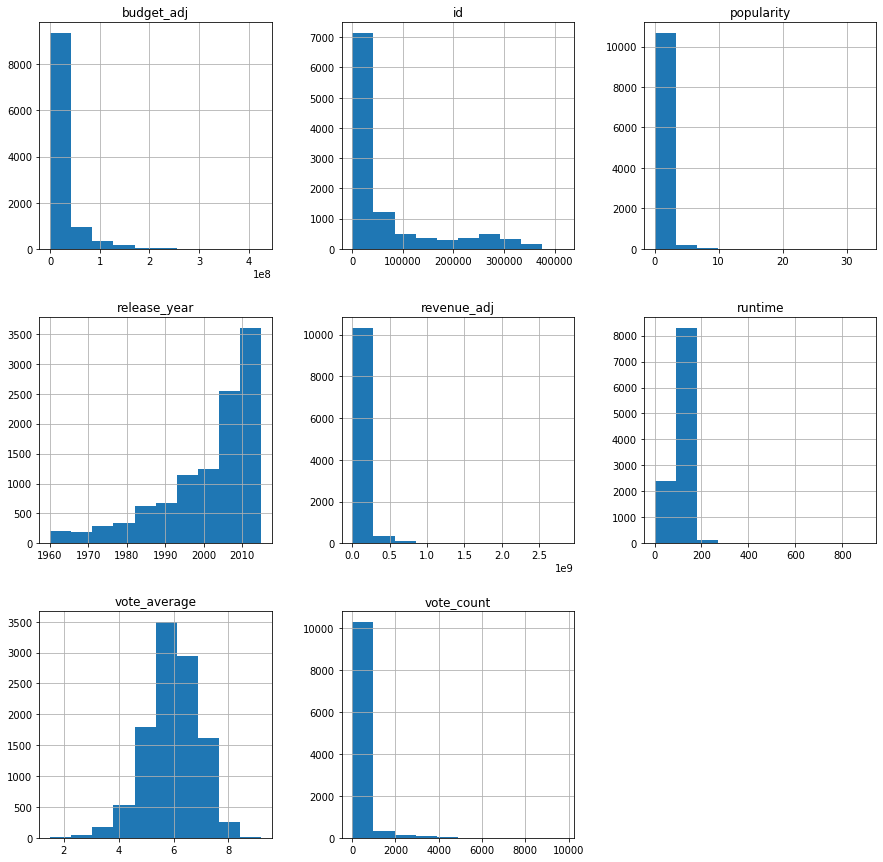

In [9]:
df.hist(figsize=(15,15));

## Q1 : Which genres are most popular from year to year?
<li> first we calculate the frequncy of each gener over years to discover which gener is more repeated (i assumed that if movie with certain geners is sucess they will produce it over years)</li>
<li> second we will take mean of popularity for each gener for each year over year </li>

In [10]:
df = df[df["genres"].isnull() == False]  #choose only no null values for geners

In [11]:
df.shape

(10842, 13)

In [12]:
df['genres'].value_counts() #take a look about what is a unique value for each gener

Drama                                       712
Comedy                                      712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Music|Family|Drama                            1
Comedy|Family|Adventure|Crime                 1
Animation|Family|Adventure|Drama|Fantasy      1
Crime|Family|Comedy                           1
Comedy|Drama|Horror|Thriller                  1
Name: genres, Length: 2039, dtype: int64

<b> We have a problem that in gener field there is more than one gener so we will split by using str.split which return a list of generes </b>

In [13]:
df["genres"] = df["genres"].str.split('|') #split geners column

In [14]:
df["cast"] = df["cast"].str.title()  #make all name title 
df["cast"] = df["cast"].str.split('|') #also split cast column (we will use it in second question)

In [15]:
df["director"] = df["director"].str.title()
df["director"] = df["director"].str.split('|')

In [16]:
#get unique years to use it as key of dictionary (key : years , value: frequancies) 
unique_years = df['release_year'].unique().tolist()
unique_years.sort() #sort years Ascendind

In [17]:
df_geners_and_years = df[['genres','release_year']]


In [18]:
#print (unique_years)
#make dictinary for every year contain the number appear this gener in this year
#this cell and the next two cell is to convert dictinary to data frame 
year_gener_dict= {}
for year in unique_years :
    df_geners_and_years = df[['genres','release_year']]
    df_geners_and_years = df_geners_and_years[df_geners_and_years['release_year']==year]
    year_gener_dict[year]={}
    for index, value in df_geners_and_years['genres'].items():
             for item in value:
                  if item in year_gener_dict[year]:
                        year_gener_dict[year][item] +=1
                  else:
                        year_gener_dict[year][item]=1

In [19]:
years_as_index = unique_years
g_df_columns = []
for year in years_as_index:
    for k,v in year_gener_dict[year].items():
        if k not in g_df_columns:
            g_df_columns.append(k) 

In [20]:
geners_dict ={}
for col in g_df_columns :
    geners_dict[col] = []
for year in years_as_index:
    for gener in geners_dict:
        if gener in year_gener_dict[year]:
            geners_dict[gener].append(year_gener_dict[year][gener])
        elif gener not in year_gener_dict[year]:
            geners_dict[gener].append(0)

In [21]:
#make a new data frame contains only years as index and geners are column data are teh frequancies
years_and_geners_df = pd.DataFrame(data=geners_dict,index=years_as_index)


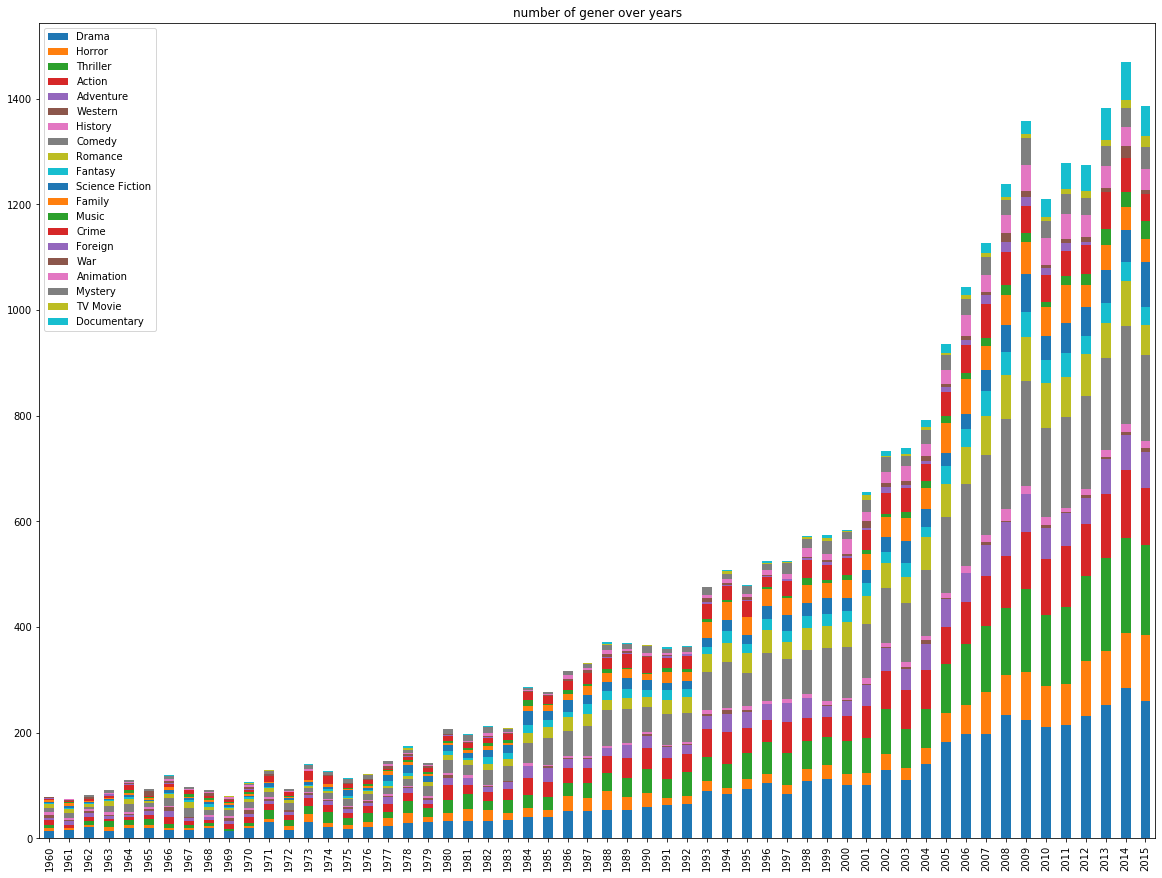

In [22]:
#change geners over years
years_and_geners_df.plot.bar(stacked=True, figsize=(20,15),title='number of gener over years');

In [23]:
years_and_geners_df.describe()

,Drama,Horror,Thriller,Action,Adventure,Western,History,Comedy,Romance,Fantasy,Science Fiction,Family,Music,Crime,Foreign,War,Animation,Mystery,TV Movie,Documentary
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,85.000000,29.232143,51.910714,42.571429,26.267857,2.946429,5.964286,67.732143,30.571429,16.357143,21.946429,21.982143,7.285714,24.178571,3.357143,4.821429,12.482143,14.464286,2.982143,9.285714
std,78.724837,30.901010,51.321545,35.948376,21.096739,2.186069,4.895134,59.957710,26.782530,14.238780,19.371413,20.073040,7.581591,19.544920,4.768947,4.204358,15.142944,12.575538,4.300068,17.247624
min,13.000000,1.000000,0.000000,4.000000,5.000000,0.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.750000,8.750000,15.250000,12.500000,7.750000,1.000000,3.000000,13.000000,6.750000,3.000000,6.000000,4.000000,2.750000,7.750000,0.000000,2.000000,2.000000,5.000000,0.000000,0.750000
50%,53.000000,18.000000,30.500000,32.500000,18.500000,3.000000,4.000000,52.500000,21.500000,14.000000,18.000000,14.500000,4.000000,19.500000,1.000000,4.000000,4.500000,9.000000,1.000000,2.000000
75%,110.750000,29.250000,67.750000,63.250000,40.250000,4.000000,8.000000,101.750000,48.250000,23.250000,28.250000,36.000000,10.250000,35.250000,4.000000,6.250000,21.500000,22.500000,3.500000,6.250000
max,284.000000,125.000000,179.000000,129.000000,72.000000,8.000000,24.000000,198.000000,85.000000,49.000000,86.000000,72.000000,33.000000,71.000000,18.000000,23.000000,50.000000,51.000000,20.000000,73.000000


<b>From the previous graph and statistic we observe that drama is the most frequent gener but it does not mean is the most popular gener beacuse as we notice there are a many combination of geners for the single movie  </b><br/>

<b>so we will use mean of popularity score to know what is the most popular gener over years  </b>


In [24]:
geners = years_and_geners_df.columns  #get genres as a list 
popularity_rate_over_years ={} #make dict for popularity mean
years_for_pop_geners = {} #dict for corresponding year (gener may appear in year and not appear in another)
for gener in geners:
    popularity_rate_over_years[gener] = df[df['genres'].apply(lambda x :True if gener in x else False )==True].groupby('release_year').mean()['popularity'].tolist()
    years_for_pop_geners[gener] = df[df['genres'].apply(lambda x :True if gener in x else False )==True].groupby('release_year').mean().index


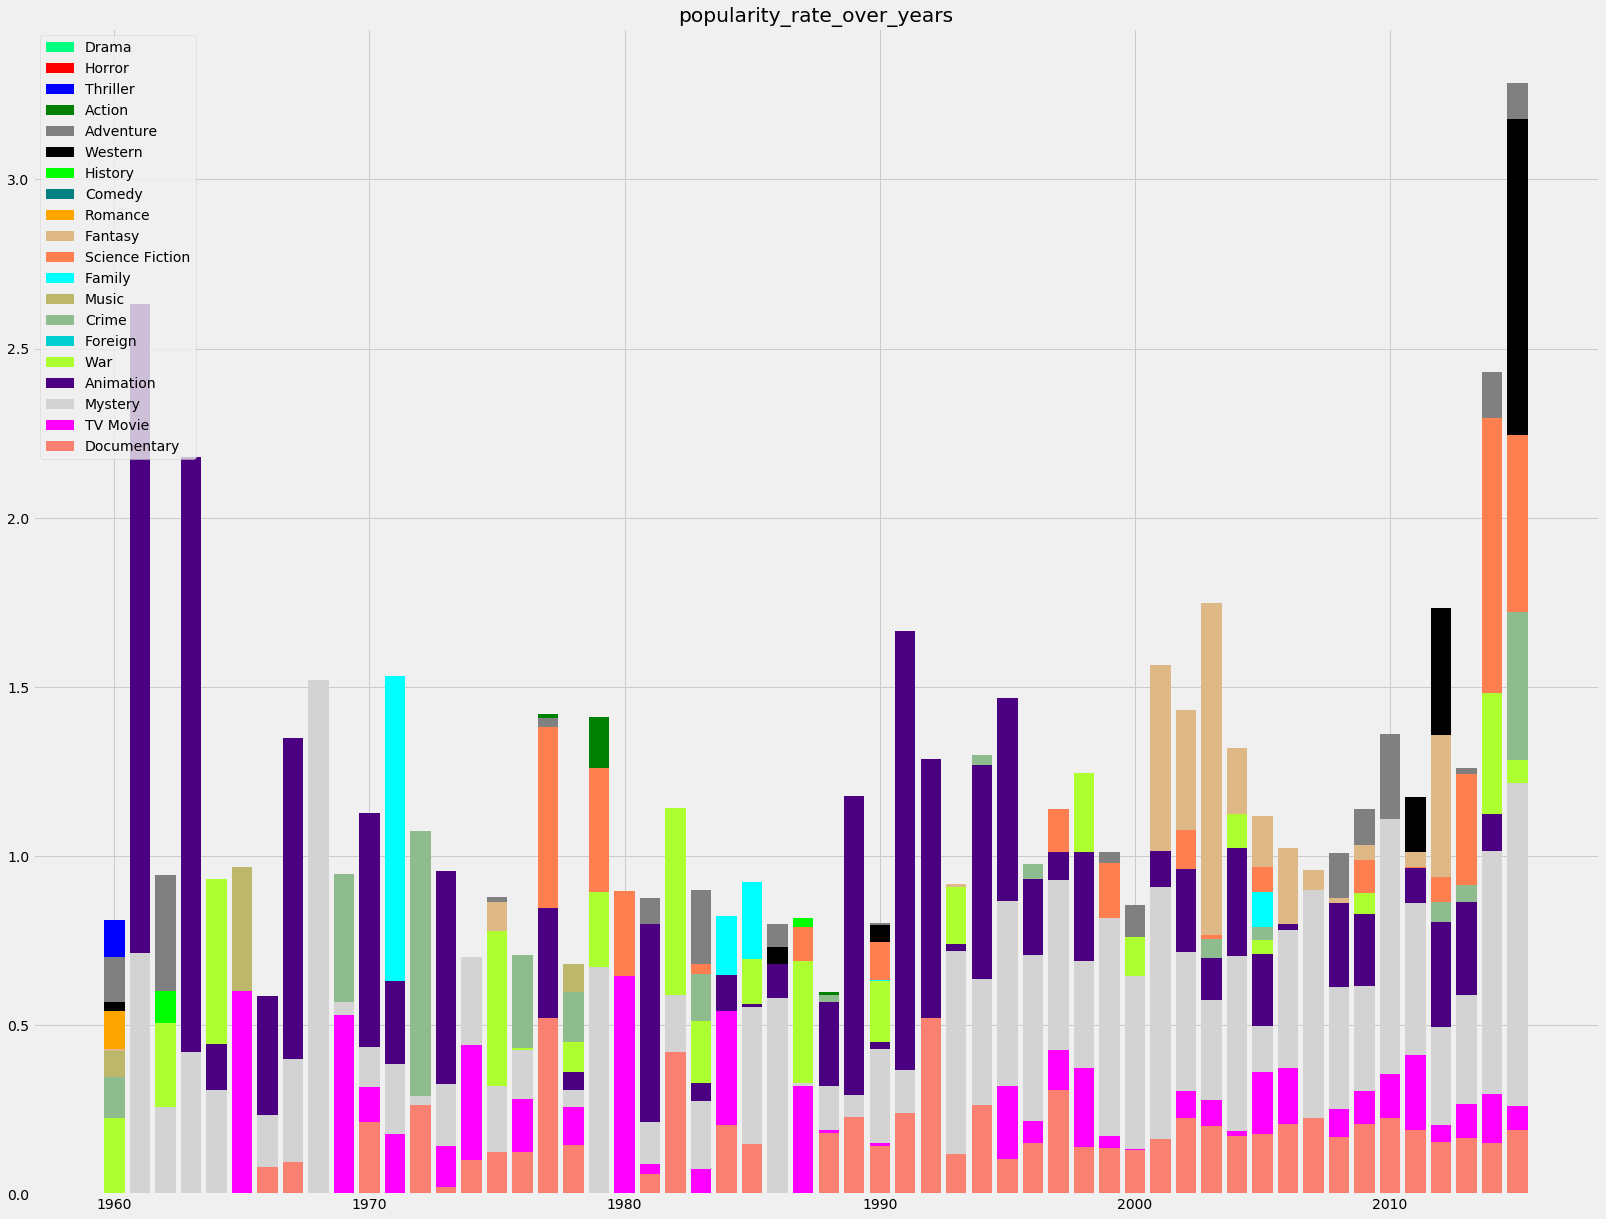

In [25]:
#use the previous two dictionary and matplot to draw stacked bar 
plt.style.use('fivethirtyeight')

colors = ['black','springgreen','red','blue','green','gray','black','lime','teal','orange','burlywood','coral','cyan','darkkhaki','darkseagreen','darkturquoise','greenyellow','indigo','lightgray','magenta','salmon']
# Fixing random state for reproducibility
fig, ax = plt.subplots(figsize=(25,20))
i=0
for gener in geners:
    i+=1
    ax.bar(years_for_pop_geners[gener],popularity_rate_over_years[gener],label=gener,color=colors[i])    
plt.legend(loc='upper left')

ax.set_title("popularity_rate_over_years")

plt.show()


<li> in 60'S Animation movies is the most popular <br/></li>
<li> in 70's Tv movies take the lead i think because TV invented in the last of 60's</li>
<li> in 80 's Mystery movies is most popular  </li>
<li>90's Mystery and Animation take the lead </li>
<li>2000 -2015  Mystery and fantasy is the most popular movies</li>


<b>even though Drama is most frequencies over years but it isn’t the most popular that is mean drama with combination with other geners like Action and Adventure make a good movie </b>

<a id="q2"></a>
## Q2 : What kinds of properties are associated with movies that have high revenues?

to answer this question, we make the following steps:<br/>
1- sort data frame according to revenue_adj column<br/>
2- Select top 50 movie then compare with whole data frame statistical


In [26]:
#sort df according to revenue_adj
top_50 = df.sort_values(by='revenue_adj',ascending=False).head(50)


In [27]:
top_50.describe() #get descriptive statstics to top 50 movies data frame

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01
mean,25253.140000,5.594902,136.560000,3641.600000,7.144000,1997.700000,1.392524e+08,1.317835e+09
std,48606.929426,4.761581,28.385941,2138.365769,0.588377,16.044899,8.145784e+07,4.451266e+08
min,11.000000,0.760503,78.000000,201.000000,5.600000,1961.000000,2.372625e+07,9.658933e+08
25%,582.750000,2.758491,121.250000,2498.500000,6.725000,1985.500000,7.110709e+07,1.033247e+09
50%,1878.000000,4.950633,136.000000,3375.500000,7.200000,2002.500000,1.392025e+08,1.145192e+09
75%,18776.500000,6.684794,153.500000,4805.500000,7.500000,2011.000000,1.886158e+08,1.388085e+09
max,211672.000000,32.985763,201.000000,8903.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


<b> dependent variable is "revenue_adj"<br/> 
independents variables are :<br/>
1-budget_adj<br/>
2-popularity<br/>
3-geners<br/>
4-runtime<br/> </b>

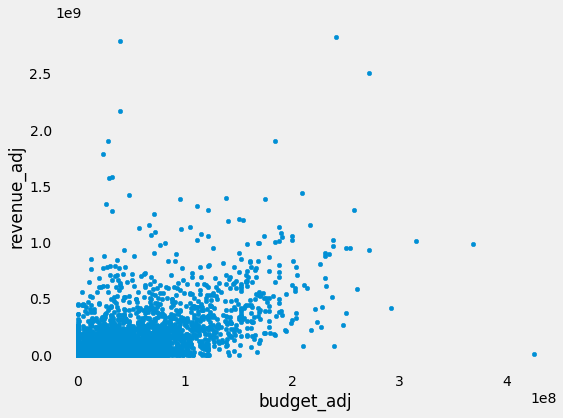

In [28]:
#revenue_adj vs budget_adj
df.plot.scatter(x='budget_adj',y='revenue_adj',figsize=(8,6),grid=False);

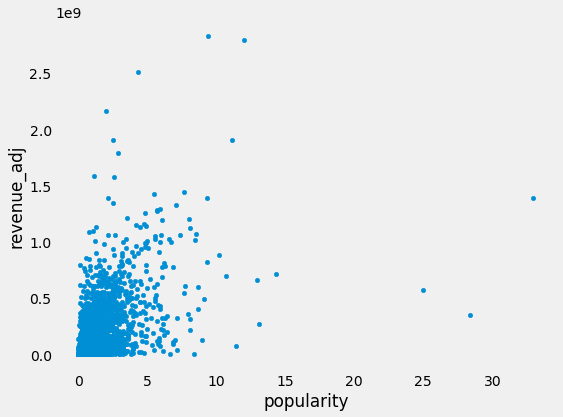

In [29]:
df.plot.scatter(x='popularity',y='revenue_adj',figsize=(8,6),grid=False);

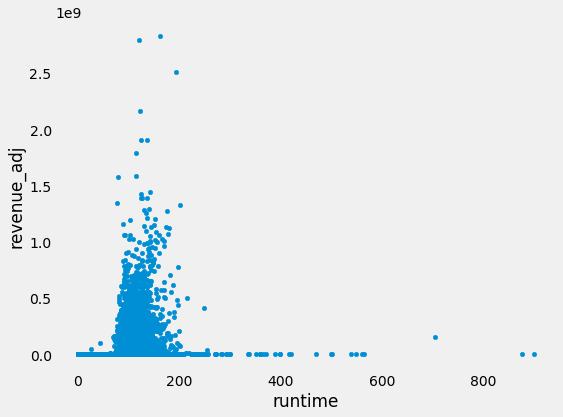

In [30]:
df.plot.scatter(x='runtime',y='revenue_adj',figsize=(8,6),grid=False);

In [31]:
indep_vs_dep_df = df[['revenue_adj','budget_adj','popularity','runtime']]
indep_vs_dep_df.corr()

,revenue_adj,budget_adj,popularity,runtime
revenue_adj,1.000000,0.646507,0.608964,0.175615
budget_adj,0.646507,1.000000,0.513311,0.220955
popularity,0.608964,0.513311,1.000000,0.138433
runtime,0.175615,0.220955,0.138433,1.000000


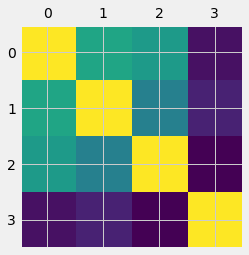

In [32]:
#digram for correlation 
plt.matshow(indep_vs_dep_df.corr())
plt.show()

Observation <br/>
<li>budget and revenue has an positive correlation about r=0.646507 </li>
<li>And it does make sense when revenue increase the popularity increased with r=0.608964 </li>
<li>but there is the weak correlation between runtime and revenue, the runtime means about 130 minutes <br/>that is means most       successful has long run time than other movies mean of 
    all movies = 102 minutes otherwise mean of top_50 is 136 min </li>


## Question : is there is a certain geners common in the top 50 movies<br/>
### we will see which geners most appear in top 50 movies


In [33]:
geners = years_and_geners_df.columns
popularity_rate_over_years ={}
years_for_pop_geners = {}
for gener in geners:
    popularity_rate_over_years[gener] = df[df['genres'].apply(lambda x :True if gener in x else False )==True].groupby('release_year').mean()['popularity'].tolist()
    years_for_pop_geners[gener] = df[df['genres'].apply(lambda x :True if gener in x else False )==True].groupby('release_year').mean().index

In [34]:
geners = years_and_geners_df.columns
top_50_geners={}
for gener in geners:
        top_50_geners[gener]=top_50[top_50['genres'].apply(lambda x :True if gener in x else False )==True].count()['id']

In [35]:
top_50_geners_df = pd.DataFrame({'Frequency':list(top_50_geners.values())},index=top_50_geners.keys())

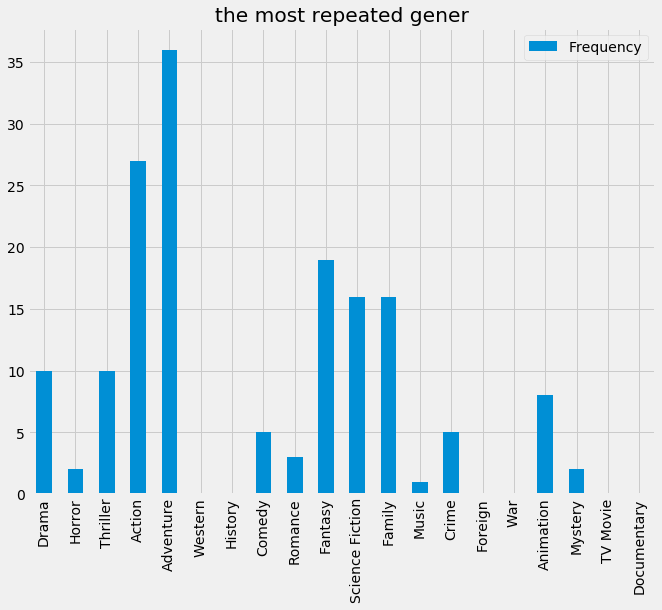

In [36]:
top_50_geners_df.plot.bar(figsize=(10,8),title='the most repeated gener');

<b> observation <br/></b>
<b> Adventure movies is the most geners in top 50 movies then Action and so on </b>

###  Also we will compare budget of top 50 movies with the mean budget for all movies to see if really budget is effect on movie success 

In [37]:
top_50[top_50['budget_adj']>=df['budget_adj'].mean()].count()

id                50
popularity        50
original_title    50
cast              50
director          50
runtime           50
genres            50
release_date      50
vote_count        50
vote_average      50
release_year      50
budget_adj        50
revenue_adj       50
dtype: int64

<b>observation 
all top 50 movies have budget greater than the mean of all movies what is make sense </b>

### Question : Is there is a director or actor make movie which get more revenue ?

In [38]:
directors_dict = {}     #create an empty dictionary (key is director name and value is the number of movies creaated by him)
for director_list in top_50['director'].tolist():
    if type(director_list)==list:
        for director in director_list:
            if director in directors_dict:
                directors_dict[director] += 1
            else:
                directors_dict[director] =1
    else:
         if director in directors_dict:
                directors_dict[director] += 1
         else:
              directors_dict[director] =1
                


In [39]:
#create data frame for the frequancies dictionary
top_50_director_df=pd.DataFrame({'Frequency':list(directors_dict.values())},index=directors_dict.keys()) 


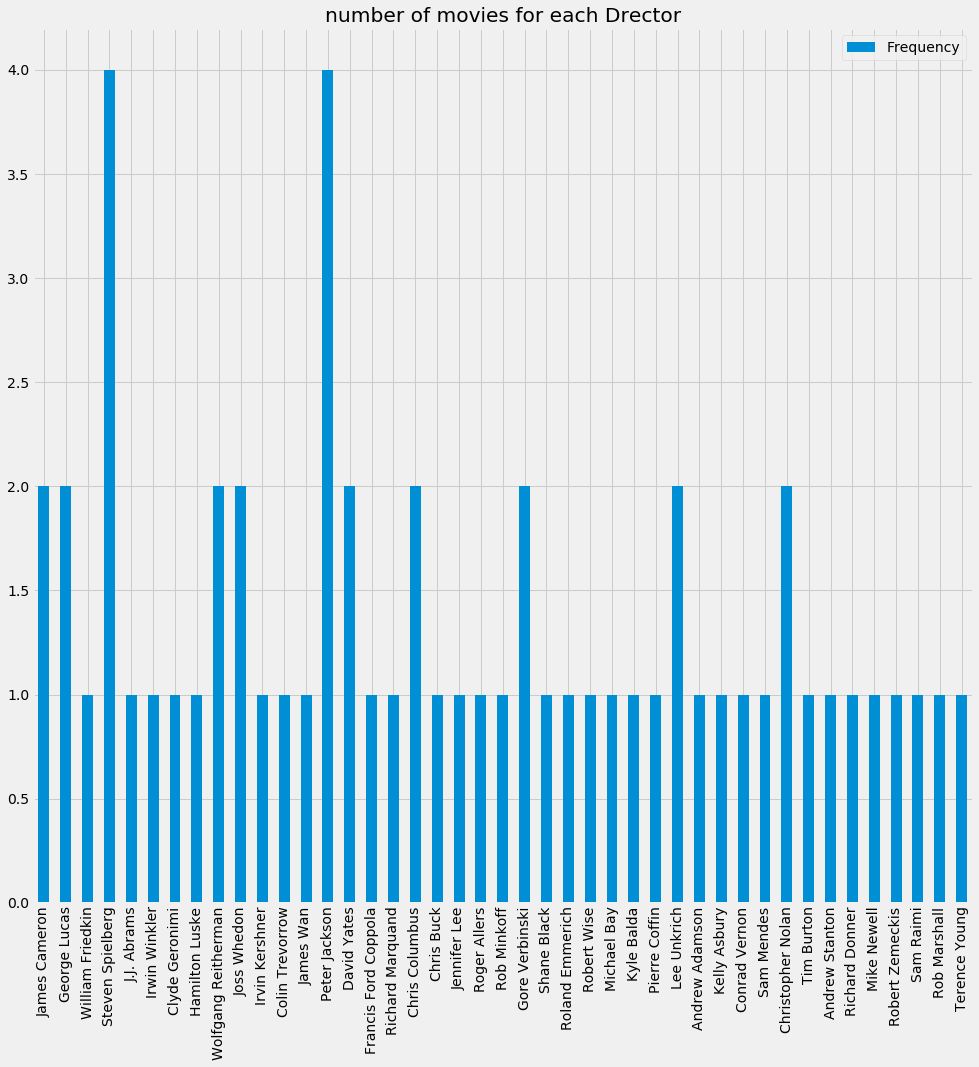

In [40]:
top_50_director_df.plot.bar(figsize=(15,15),title='number of movies for each Drector');

<h2>Observation:</h2>
<b> Peter Jackson,Steven Spielberg make 16% from top 50 movies which may be an indicator that director affect on movie revenus</b> 

In [41]:
actress_dict = {}
for actress_list in top_50['cast'].tolist():
    if type(actress_list)==list:
        for actor in actress_list:
            if actor in actress_dict:
                actress_dict[actor] += 1
            else:
                actress_dict[actor] =1
    else:
         if actor in actress_dict:
                actress_dict[actor] += 1
         else:
                actress_dict[actor] =1
                

In [42]:
top_50_acctress_df = pd.DataFrame({'Frequency':list(actress_dict.values())},index=actress_dict.keys())


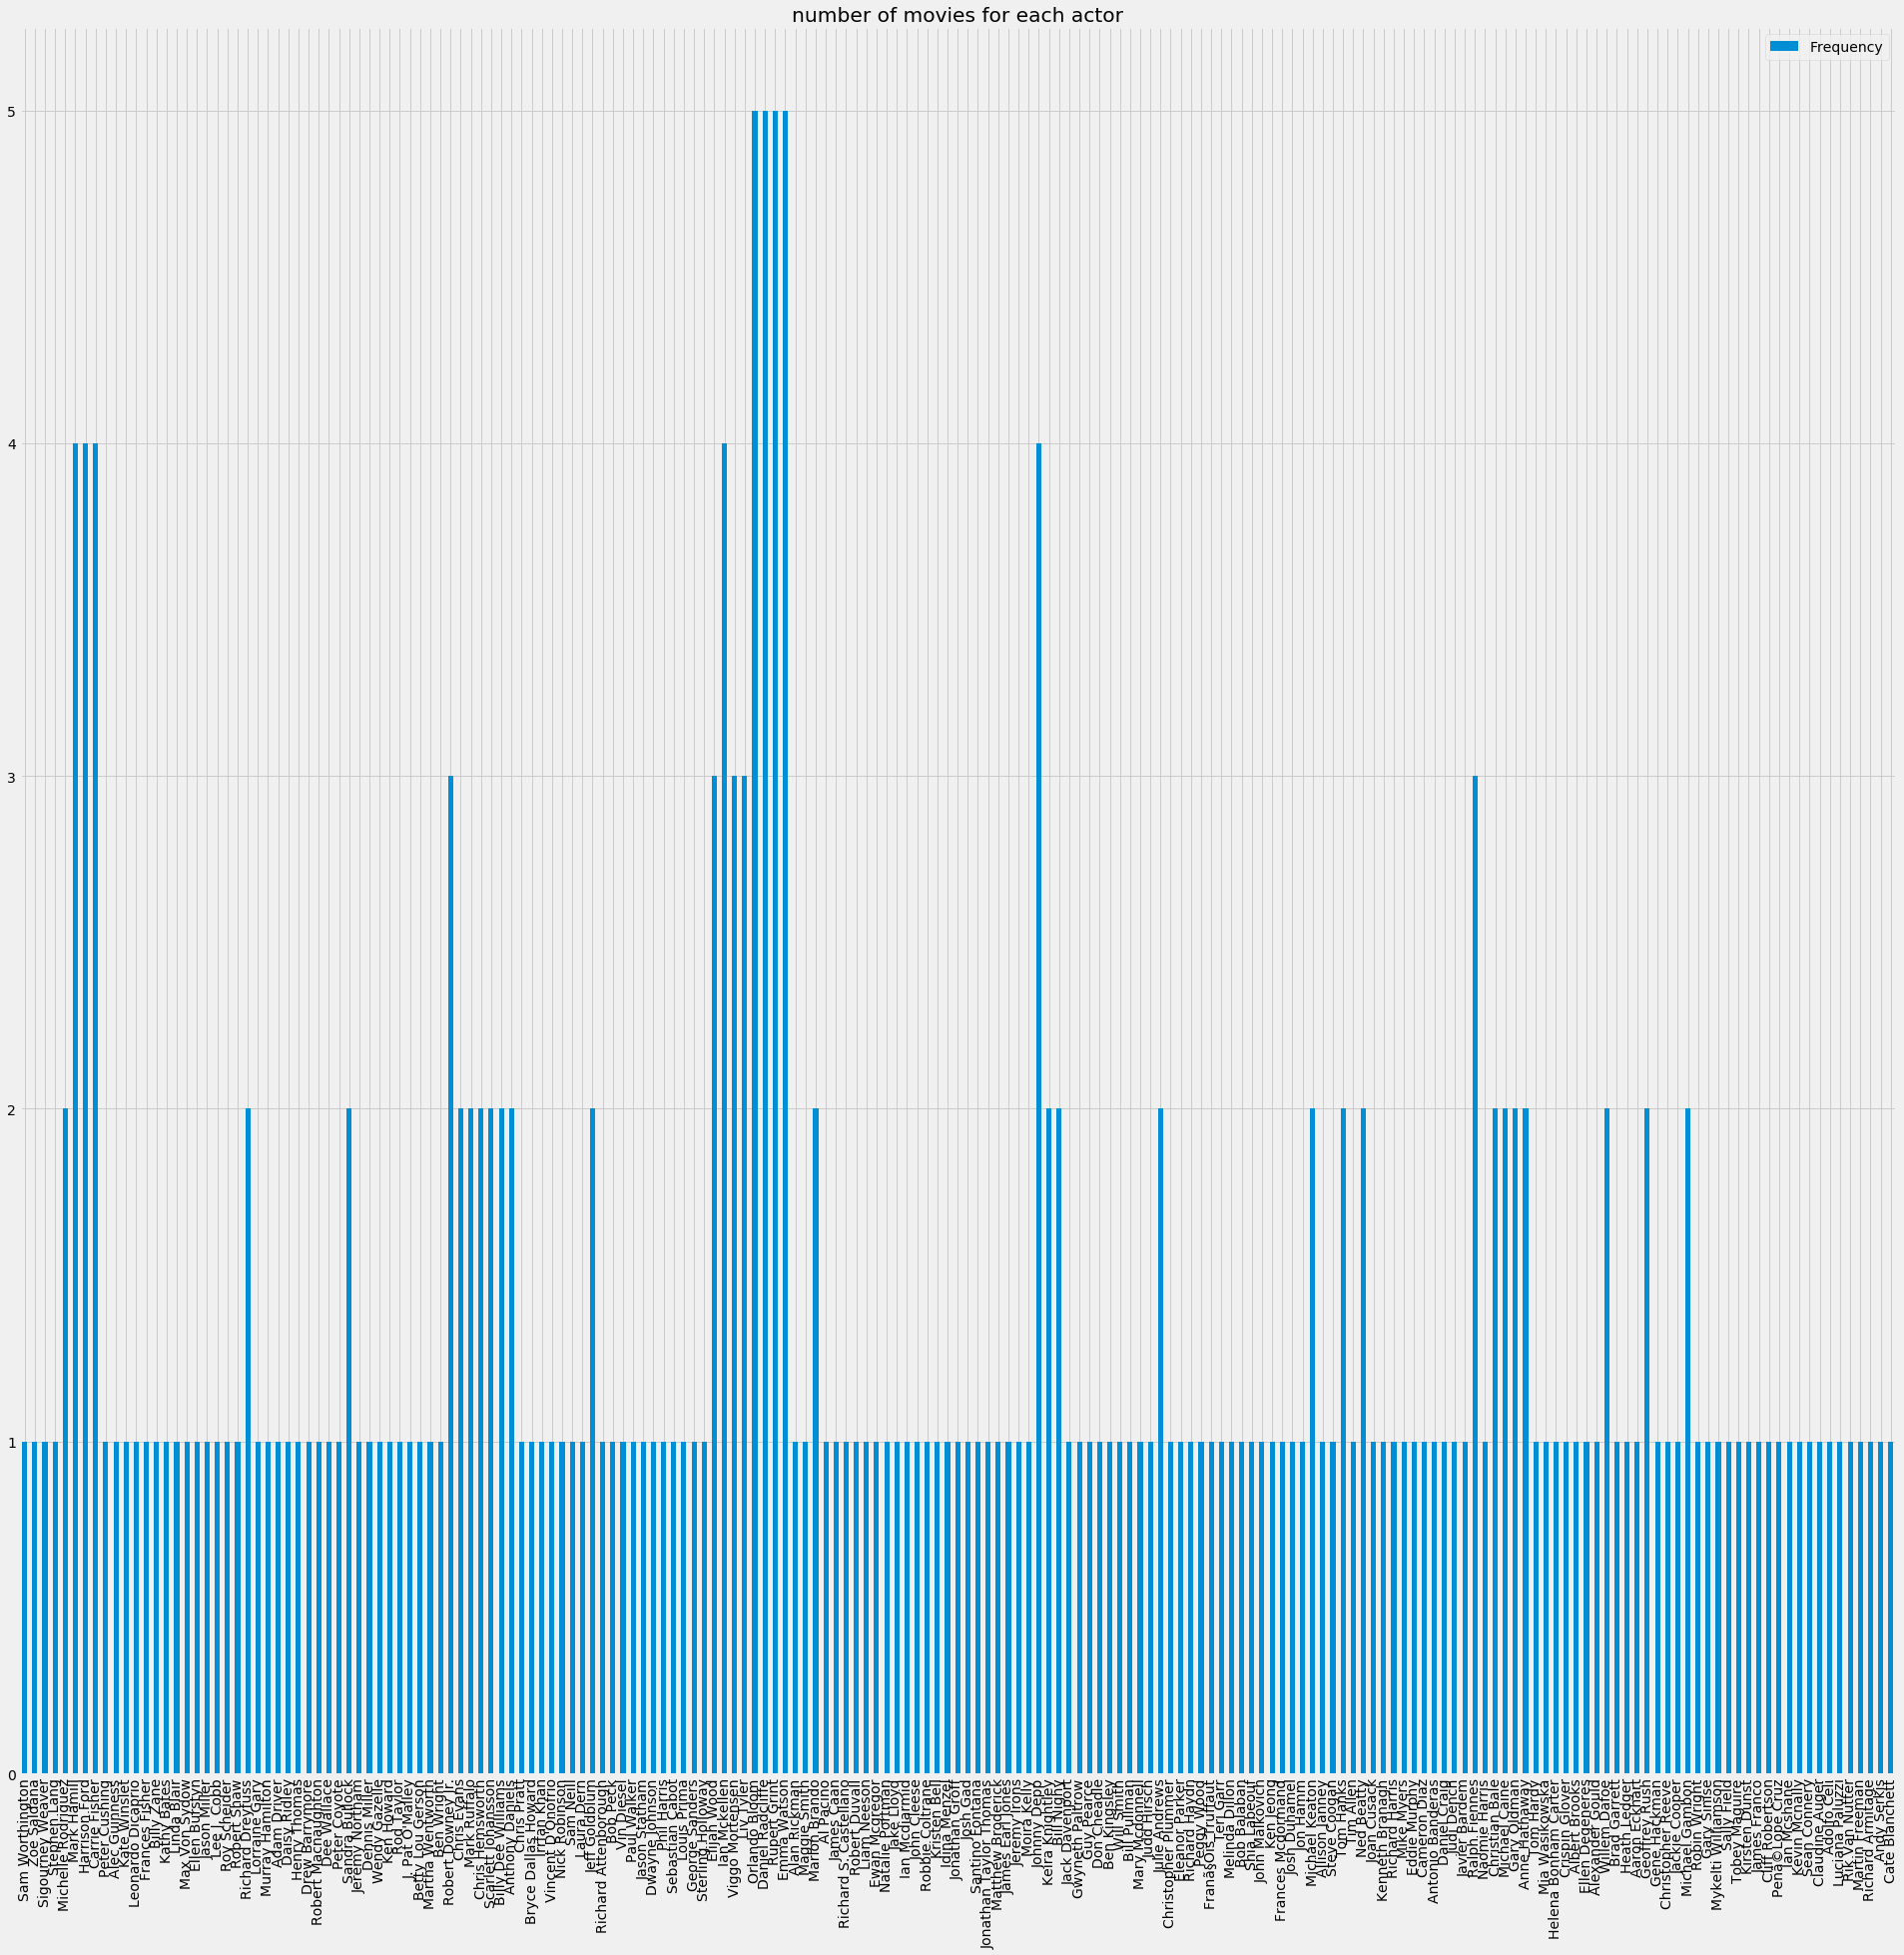

In [43]:
top_50_acctress_df.plot.bar(figsize=(30,30),title='number of movies for each actor');

In [44]:
#the name of actress contribures in more than 3 movies 
top_50_acctress_df[top_50_acctress_df['Frequency']>3]

,Frequency
Mark Hamill,4
Harrison Ford,4
Carrie Fisher,4
Ian Mckellen,4
Orlando Bloom,5
Daniel Radcliffe,5
Rupert Grint,5
Emma Watson,5
Johnny Depp,4


In [45]:
top_50_acctress_df[top_50_acctress_df['Frequency']>3].sum()

Frequency    40
dtype: int64

<h2> Observation :</h2>
<b>only 9 performars contribute 80% of the successful movies which is a good indicator that actor is an important factor to success the movie </b>

<a id='conclusions'></a>
## conclusions :
<font color = 'blue'><b> we use expletory data analysis in this project to try to know what is the properties of the success movies:</font><br/>
1- Big budget make a good movies and then make more revenue <br/>
2- runtime for succsful movies between 136 to 153 minutes <br/>
3- the geners for first three movies are [Action, Adventure, Fantasy, Science Fiction] , [Adventure, Action, Science Fiction],[Drama, Romance, Thriller] that is mean the combination of geners make a good movie<br/>
4- good director and cast  is a basic factor to make a good movie </b>


Resorces:
1- Dataquest.io
2-Python documentation
3-stack overflow
4-pandas & matplotlib documentati